# Testing StyleGAN2

In [5]:
import sys
import os
from pathlib import Path

# We change the working directory to the root of the project
if not 'in_good_directory' in globals():
    sys.path.append(os.path.abspath("../src"))
    sys.path.append(os.path.abspath("../src/stylegan2"))
    root_path = Path.cwd().parent
    os.chdir(root_path)
    sys.path.append(root_path / "src")

    in_good_directory = True

In [6]:
Path.cwd()

WindowsPath('c:/Users/Mathis/Desktop/Github Projects/MVA/StyleGANInpainting')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


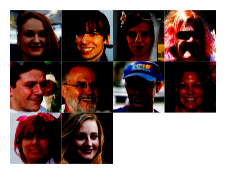

In [7]:
import stylegan2
from inpainting.utils import get_stylegan_generator, plot_images
from inpainting.sampling import sample, sample_silent

G = get_stylegan_generator()
samples = sample_silent(G, 10, device='cuda', seed=42)
plot_images(samples.clamp(-1, 1), nrow=4)

In [11]:
# save the samples to disk
import matplotlib.pyplot as plt
Path("data/samples").mkdir(exist_ok=True, parents=True)
for i, sample in enumerate(samples):
    img = (sample.clamp(-1, 1).cpu().numpy().transpose(1, 2, 0) + 1) / 2
    plt.imsave(f"data/samples/sample_{i}.png", img)
